In [1]:
library(GSEABase)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; vie

In [3]:
load(file="0423_allPC4_harmony.Rda")
#sub <- subset(allPC4, idents = "5")
sub<-allPC4
#获取基因表达量
expMat<-GetAssayData(sub,slot="data")
mydata<-as.matrix(expMat)
annotation_col<-data.frame(Type=Idents(sub))

In [5]:
##读取Geneset，导入两个数据库
geneSets <- getGmt("c2.cp.reactome.v7.4.symbols.gmt")

In [6]:
##读取Geneset
geneSets2 <- getGmt("c2.cp.kegg.v7.4.symbols.gmt")

In [9]:
##使用数据库1 ，运行GSVA，返回二项式分布的结果
res_es <- gsva(mydata, geneSets, min.sz=10, max.sz=500, verbose=FALSE, kcdf="Gaussian",method = "gsva",parallel.sz=1)

Warning message in .filterFeatures(expr, method):
“2773 genes with constant expression values throuhgout the samples.”
Warning message in .filterFeatures(expr, method):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”


In [10]:
save(res_es,file="0424reses_reactome.Rda")

In [132]:
##使用数据库2,运行GSVA，返回二项式分布的结果
res_es2 <- gsva(mydata, geneSets2, min.sz=10, max.sz=500, verbose=FALSE, kcdf="Gaussian",method = "gsva",parallel.sz=1)

Warning message in .filterFeatures(expr, method):
“2773 genes with constant expression values throuhgout the samples.”
Warning message in .filterFeatures(expr, method):
“Since argument method!="ssgsea", genes with constant expression values are discarded.”


In [133]:
save(res_es2,file="0424reses_KEGG.Rda")

In [5]:
load(file="0424reses_KEGG.Rda")

In [6]:
load(file="0424reses_reactome.Rda")

In [11]:
#plot the mean enrichment score

In [12]:
colnames(sub@meta.data)
summary(sub@meta.data$seurat_clusters)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "percent.mt"     
[5] "percent.ig"      "RNA_snn_res.0.3" "seurat_clusters" "percent.hb"

0    1    2    3    4    5    6 
3679 2320  701  598  203  170  152

In [8]:
library(dplyr)
meta <- as.data.frame(sub@meta.data[,c('orig.ident',"seurat_clusters")])
meta <- meta %>%arrange(meta$seurat_clusters)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:GSEABase’:

    intersect, setdiff, union


The following object is masked from ‘package:graph’:

    union


The following object is masked from ‘package:AnnotationDbi’:

    select


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following object is masked from ‘package:Biobase’:

    combine


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [14]:
data<-res_es
data <- data[,rownames(meta)]
identical(colnames(data),rownames(meta))

[1] TRUE

In [15]:
table(meta$seurat_clusters)


   0    1    2    3    4    5    6 
3679 2320  701  598  203  170  152 

In [16]:
cluster0 <- apply(data[,1:3679], 1, mean)
cluster1 <- apply(data[,3680:5999], 1, mean)
cluster2 <- apply(data[,6000:6700], 1, mean)
cluster3 <- apply(data[,6701:7298], 1, mean)
cluster4 <- apply(data[,7299:7501], 1, mean)
cluster5 <- apply(data[,7502:7671], 1, mean)
cluster6 <- apply(data[,7672:7823], 1, mean)
data3<-data.frame(cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6)

In [49]:
write.table(data3,file="0425-mean-reactome.txt")

In [14]:
data3<-read.table(file="0425-mean-reactome.txt")

In [19]:
options(repr.plot.height=10,repr.plot.width=20)

In [24]:
#pathways<-c("REACTOME_CELL_CYCLE_MITOTIC","REACTOME_ENDOSOMAL_VACUOLAR_PATHWAY","REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION","REACTOME_DOWNSTREAM_SIGNALING_EVENTS_OF_B_CELL_RECEPTOR_BCR","REACTOME_CELLULAR_RESPONSE_TO_HYPOXIA","REACTOME_APOPTOSIS","REACTOME_DOWNREGULATION_OF_ERBB2_ERBB3_SIGNALING","REACTOME_NF_KB_IS_ACTIVATED_AND_SIGNALS_SURVIVAL","REACTOME_TGF_BETA_RECEPTOR_SIGNALING_ACTIVATES_SMADS","REACTOME_REGULATION_OF_FZD_BY_UBIQUITINATION","REACTOME_METABOLIC_DISORDERS_OF_BIOLOGICAL_OXIDATION_ENZYMES","REACTOME_INTERLEUKIN_10_SIGNALING","REACTOME_INTERLEUKIN_4_AND_INTERLEUKIN_13_SIGNALING","REACTOME_EUKARYOTIC_TRANSLATION_INITIATION","REACTOME_TICAM1_DEPENDENT_ACTIVATION_OF_IRF3_IRF7","REACTOME_ER_QUALITY_CONTROL_COMPARTMENT_ERQC","REACTOME_NEGATIVE_REGULATORS_OF_DDX58_IFIH1_SIGNALING","REACTOME_INTERLEUKIN_2_SIGNALING","REACTOME_CHAPERONE_MEDIATED_AUTOPHAGY","REACTOME_NEGATIVE_REGULATION_OF_FLT3","REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR","REACTOME_SIGNALING_BY_VEGF","REACTOME_UNFOLDED_PROTEIN_RESPONSE_UPR")

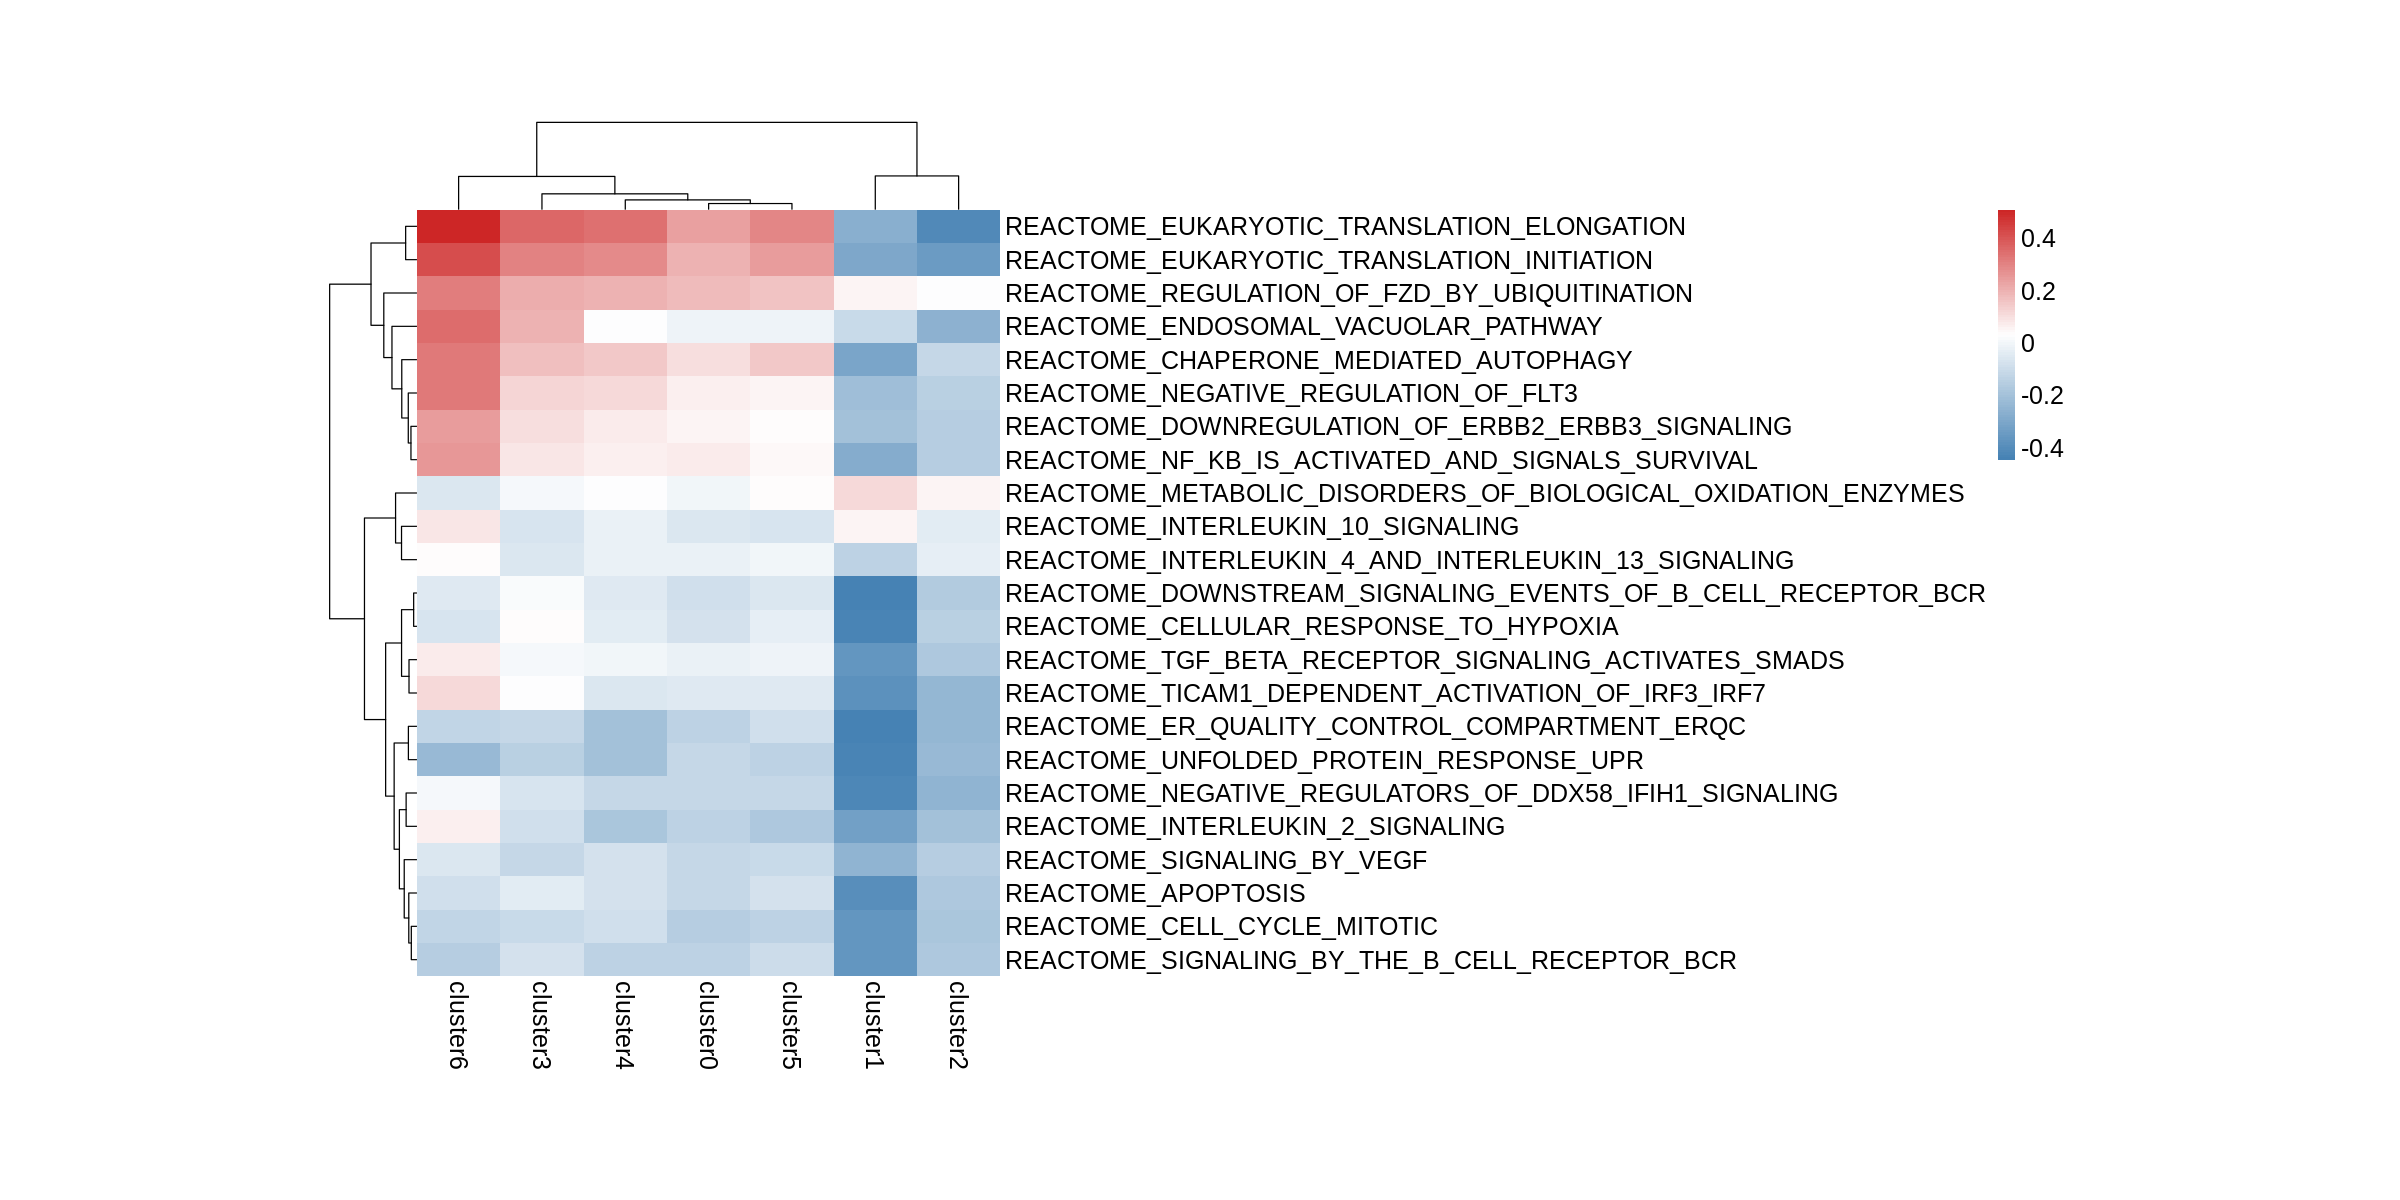

In [25]:
#library(pheatmap)
draw<-data3[pathways,]
#colnames(data2)<-c("Cluster5~Cluster0","Cluster5~Cluster1","Cluster5~Cluster2", "Cluster5~Cluster3","Cluster5~Cluster4","Cluster5~Cluster6")
pheatmap(draw,scale="none",border=FALSE,color=colorRampPalette(c("steelblue","white","firebrick3"))(100),cellheight=20,cellwidth=50,fontsize=15)

In [9]:
colnames(sub@meta.data)
summary(sub@meta.data$seurat_clusters)

[1] "orig.ident"      "nCount_RNA"      "nFeature_RNA"    "percent.mt"     
[5] "percent.ig"      "RNA_snn_res.0.3" "seurat_clusters" "percent.hb"

0    1    2    3    4    5    6 
3679 2320  701  598  203  170  152

In [10]:
library(dplyr)
meta <- as.data.frame(sub@meta.data[,c('orig.ident',"seurat_clusters")])
meta <- meta %>%arrange(meta$seurat_clusters)

In [11]:
data<-res_es2
data <- data[,rownames(meta)]
identical(colnames(data),rownames(meta))

[1] TRUE

In [12]:
table(meta$seurat_clusters)


   0    1    2    3    4    5    6 
3679 2320  701  598  203  170  152 

In [13]:
cluster0 <- apply(data[,1:3679], 1, mean)
cluster1 <- apply(data[,3680:5999], 1, mean)
cluster2 <- apply(data[,6000:6700], 1, mean)
cluster3 <- apply(data[,6701:7298], 1, mean)
cluster4 <- apply(data[,7299:7501], 1, mean)
cluster5 <- apply(data[,7502:7671], 1, mean)
cluster6 <- apply(data[,7672:7823], 1, mean)
data3<-data.frame(cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6)

In [14]:
write.table(data3,file="0425-mean-kegg.txt")

In [15]:
data3<-read.table(file="0425-mean-kegg.txt")

In [16]:
options(repr.plot.height=10,repr.plot.width=20)

In [24]:
pathways<-c("REACTOME_CELL_CYCLE_MITOTIC","REACTOME_ENDOSOMAL_VACUOLAR_PATHWAY","REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION","REACTOME_DOWNSTREAM_SIGNALING_EVENTS_OF_B_CELL_RECEPTOR_BCR","REACTOME_CELLULAR_RESPONSE_TO_HYPOXIA","REACTOME_APOPTOSIS","REACTOME_DOWNREGULATION_OF_ERBB2_ERBB3_SIGNALING","REACTOME_NF_KB_IS_ACTIVATED_AND_SIGNALS_SURVIVAL","REACTOME_TGF_BETA_RECEPTOR_SIGNALING_ACTIVATES_SMADS","REACTOME_REGULATION_OF_FZD_BY_UBIQUITINATION","REACTOME_METABOLIC_DISORDERS_OF_BIOLOGICAL_OXIDATION_ENZYMES","REACTOME_INTERLEUKIN_10_SIGNALING","REACTOME_INTERLEUKIN_4_AND_INTERLEUKIN_13_SIGNALING","REACTOME_EUKARYOTIC_TRANSLATION_INITIATION","REACTOME_TICAM1_DEPENDENT_ACTIVATION_OF_IRF3_IRF7","REACTOME_ER_QUALITY_CONTROL_COMPARTMENT_ERQC","REACTOME_NEGATIVE_REGULATORS_OF_DDX58_IFIH1_SIGNALING","REACTOME_INTERLEUKIN_2_SIGNALING","REACTOME_CHAPERONE_MEDIATED_AUTOPHAGY","REACTOME_NEGATIVE_REGULATION_OF_FLT3","REACTOME_SIGNALING_BY_THE_B_CELL_RECEPTOR_BCR","REACTOME_SIGNALING_BY_VEGF","REACTOME_UNFOLDED_PROTEIN_RESPONSE_UPR")

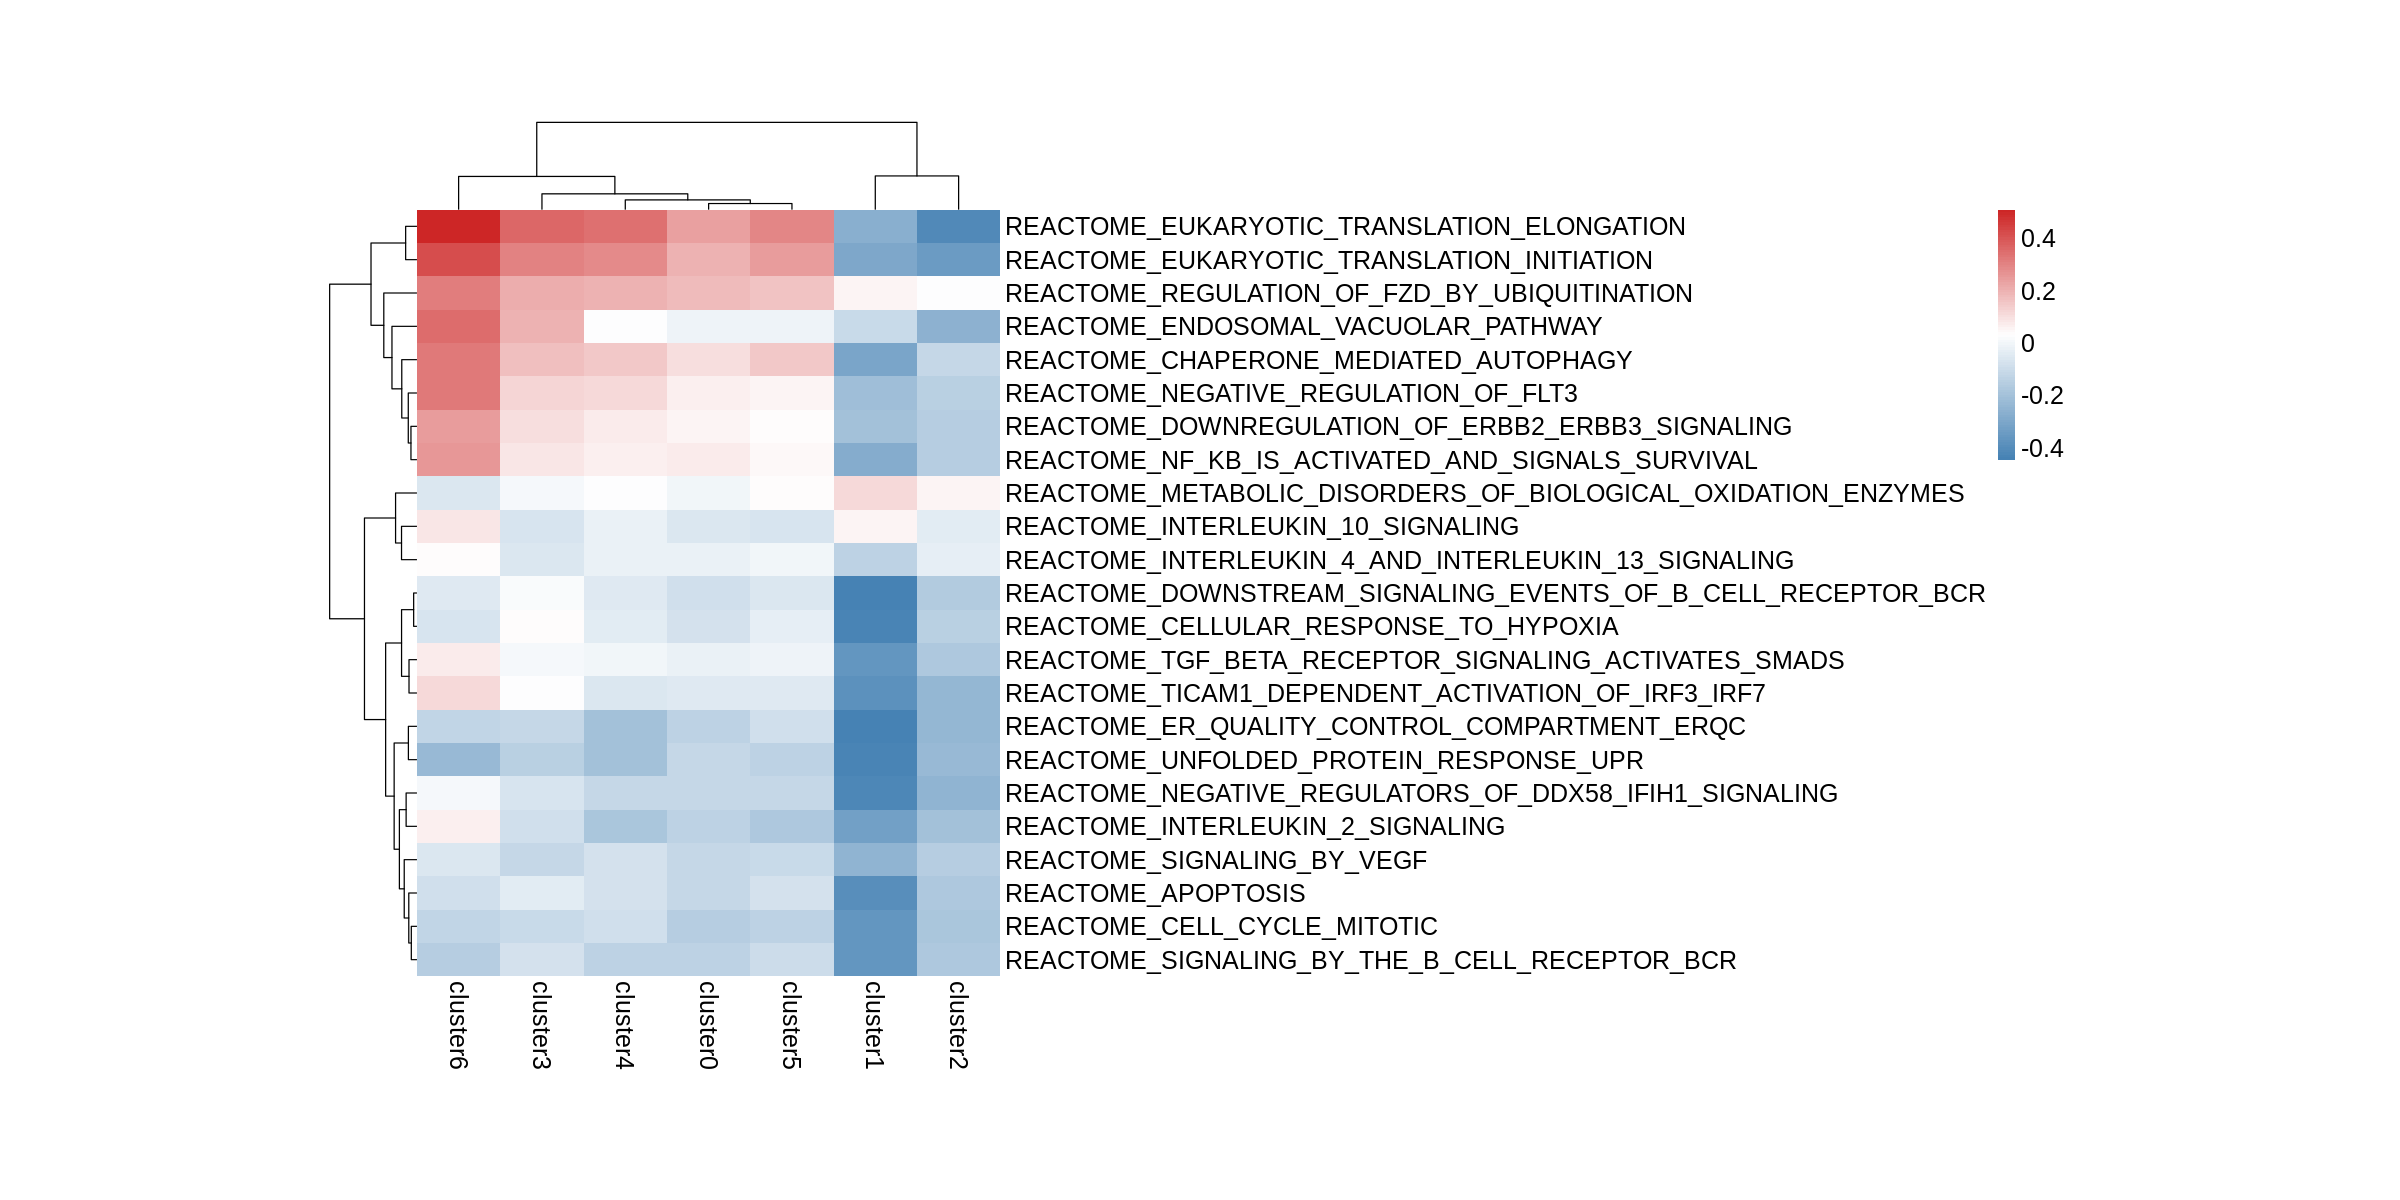

In [25]:
library(pheatmap)
draw<-data3[pathways,]
#colnames(data2)<-c("Cluster5~Cluster0","Cluster5~Cluster1","Cluster5~Cluster2", "Cluster5~Cluster3","Cluster5~Cluster4","Cluster5~Cluster6")
pheatmap(draw,scale="none",border=FALSE,color=colorRampPalette(c("steelblue","white","firebrick3"))(100),cellheight=20,cellwidth=50,fontsize=15)

In [ ]:
#compare the groups

In [25]:
##设置分组
grouP<-as.factor(annotation_col$Type)
desigN <- model.matrix(~ grouP + 0)
rownames(desigN)<-colnames(mydata)
desigN

,grouP0,grouP1,grouP2,grouP3,grouP4,grouP5,grouP6
AAACCTGAGGCTCAGA-1_1,1,0,0,0,0,0,0
AAACCTGCAGACGTAG-1_1,1,0,0,0,0,0,0
AAACCTGGTCTTCAAG-1_1,0,0,1,0,0,0,0
AAACCTGGTGTCCTCT-1_1,0,0,0,0,1,0,0
AAACCTGTCATAGCAC-1_1,1,0,0,0,0,0,0
AAACCTGTCATTATCC-1_1,0,0,0,1,0,0,0
AAACCTGTCTACTATC-1_1,1,0,0,0,0,0,0
AAACCTGTCTGGTATG-1_1,0,1,0,0,0,0,0
AAACGGGGTATTACCG-1_1,1,0,0,0,0,0,0
AAACGGGGTCTAGGTT-1_1,0,0,0,1,0,0,0


In [26]:
#这里需要手动构建差异矩阵，我这里用每个亚类的case和control比较，寻找其中的差异
comparE <- makeContrasts(clu1=grouP5-grouP0,clu2=grouP5-grouP1,clu3=grouP5-grouP2, clu4=grouP5-grouP3,clu5=grouP5-grouP4,clu6=grouP5-grouP6,levels=desigN)
#构建线性模型
fiT <- lmFit(res_es, desigN)
fiT2 <- contrasts.fit(fiT, comparE)
fiT3 <- eBayes(fiT2)
#这里获取一步ANNOVA检验获取的不同分组的log2FC,可以用来构造热图
Diff<-topTable(fiT3,p.value=0.05,num=50)

In [28]:
comparE

,clu1,clu2,clu3,clu4,clu5,clu6
grouP0,-1,0,0,0,0,0
grouP1,0,-1,0,0,0,0
grouP2,0,0,-1,0,0,0
grouP3,0,0,0,-1,0,0
grouP4,0,0,0,0,-1,0
grouP5,1,1,1,1,1,1
grouP6,0,0,0,0,0,-1


In [3]:
options(repr.plot.height=10,repr.plot.width=20)

[1] "clu1" "clu2" "clu3" "clu4" "clu5" "clu6"

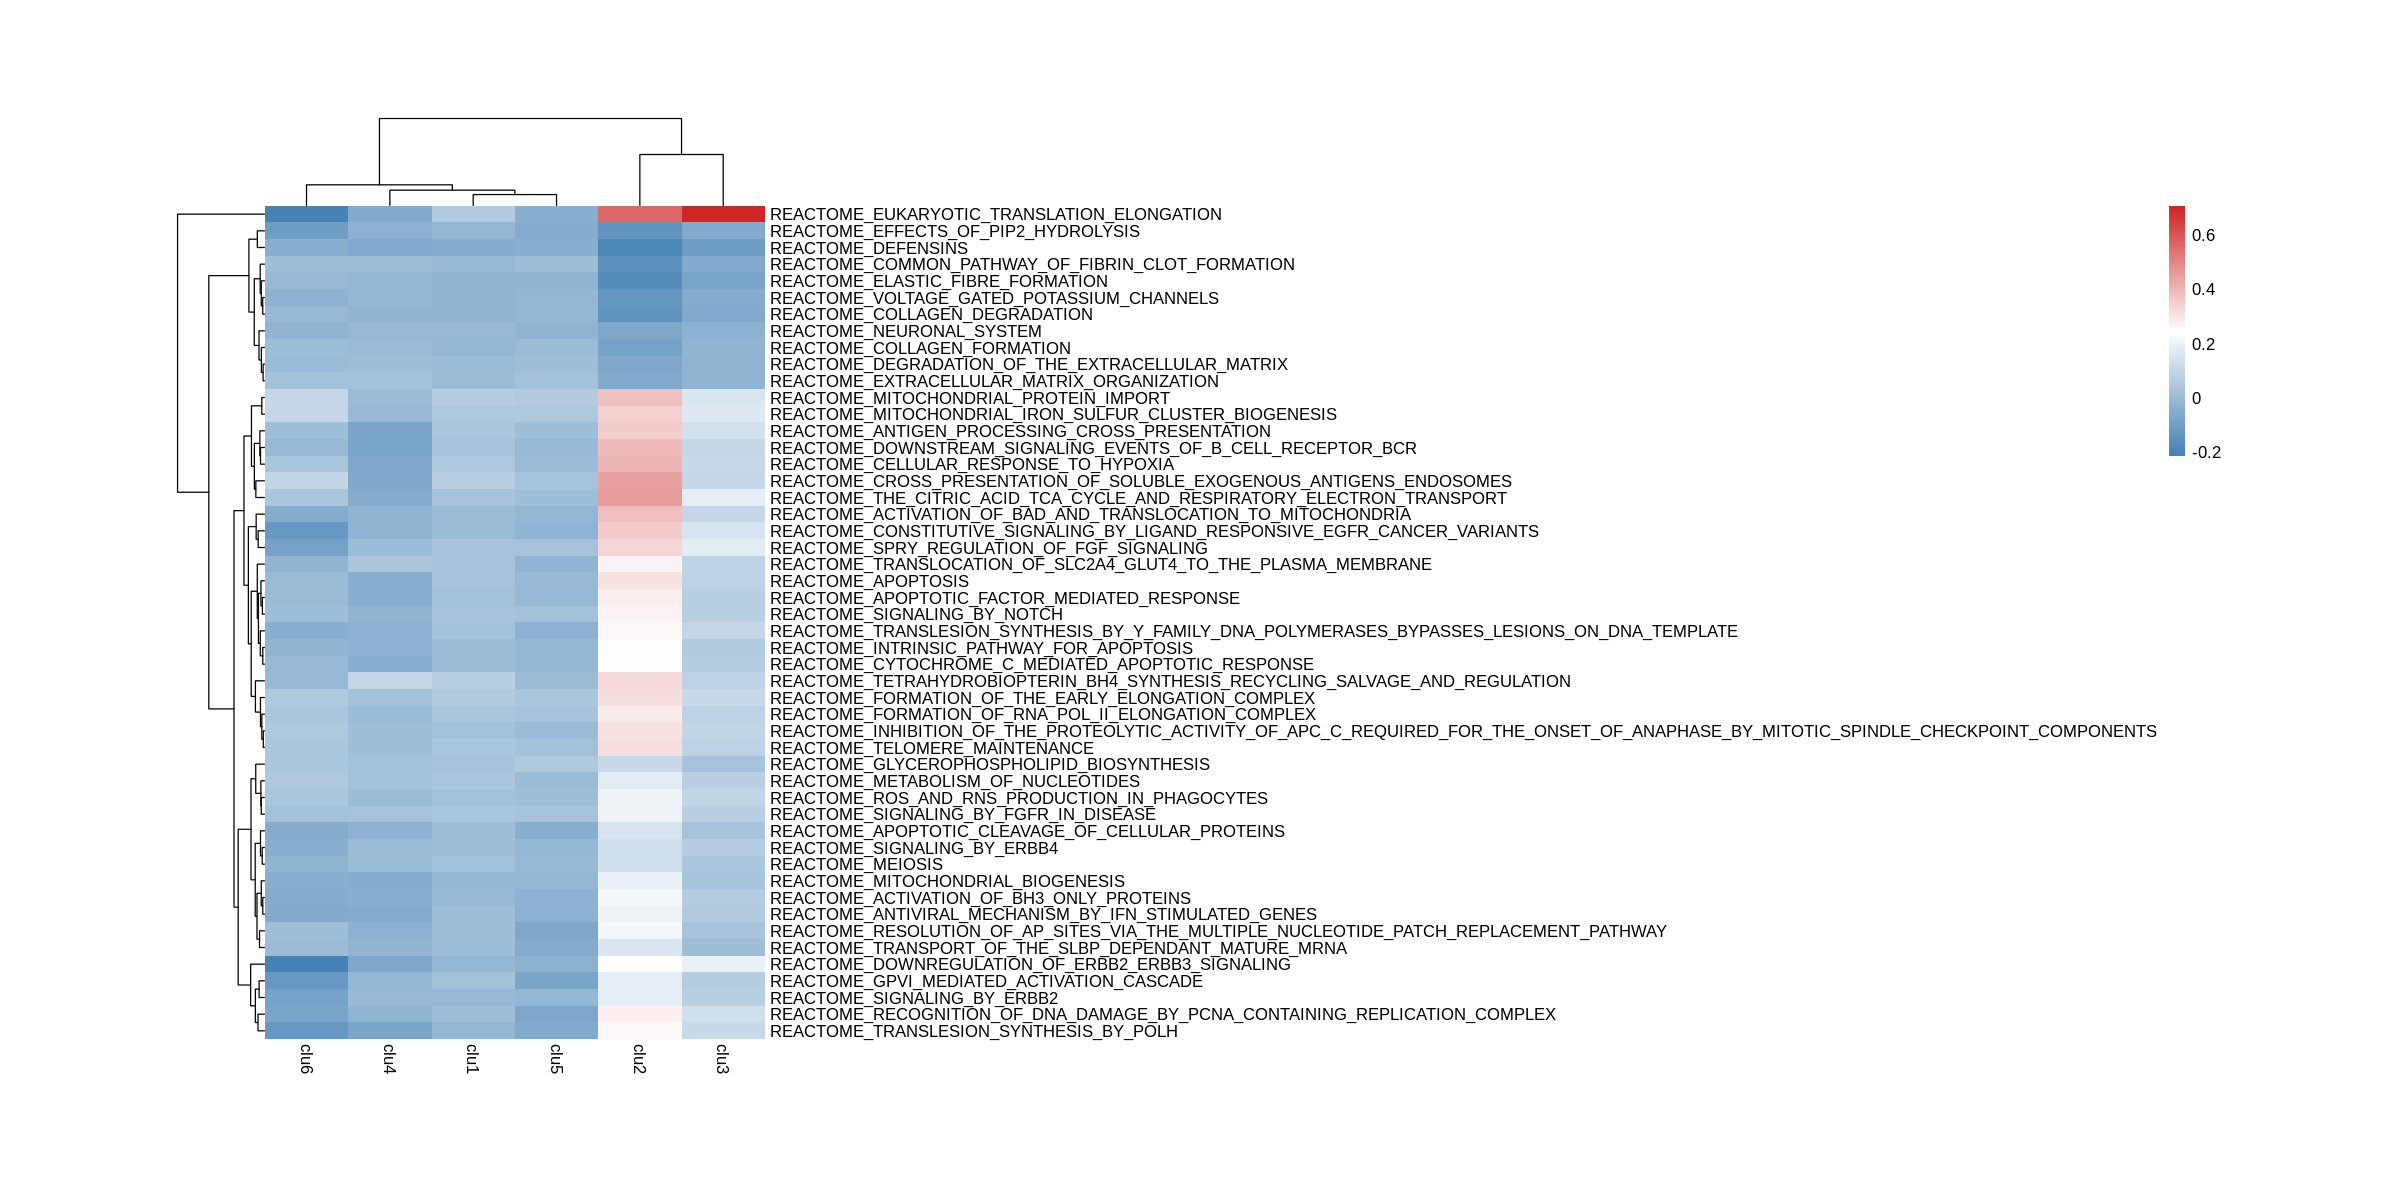

In [27]:
library(pheatmap)
data<-Diff
data2<-data[,c(1,2,3,4,5,6)]
colnames(data2)
#colnames(data2)<-c("Cluster5~Cluster0","Cluster5~Cluster1","Cluster5~Cluster2", "Cluster5~Cluster3","Cluster5~Cluster4","Cluster5~Cluster6")
pheatmap(data2,border=FALSE,color=colorRampPalette(c("steelblue","white","firebrick3"))(100),cellheight=10,cellwidth=50)

In [16]:
#这里需要手动构建差异矩阵，我这里用每个亚类的case和control比较，寻找其中的差异
comparE <- makeContrasts(clu1=grouP5-grouP0,clu2=grouP5-grouP1,clu3=grouP5-grouP2, clu4=grouP5-grouP3,clu5=grouP5-grouP4,clu6=grouP5-grouP6,levels=desigN)
#构建线性模型
fiT <- lmFit(res_es2, desigN)
fiT2 <- contrasts.fit(fiT, comparE)
fiT3 <- eBayes(fiT2)
#这里获取一步ANNOVA检验获取的不同分组的log2FC,可以用来构造热图
Diff<-topTable(fiT3,adjust="BH",p.value=0.05,num=50,lfc=0.1)

In [17]:
comparE

,clu1,clu2,clu3,clu4,clu5,clu6
grouP0,-1,0,0,0,0,0
grouP1,0,-1,0,0,0,0
grouP2,0,0,-1,0,0,0
grouP3,0,0,0,-1,0,0
grouP4,0,0,0,0,-1,0
grouP5,1,1,1,1,1,1
grouP6,0,0,0,0,0,-1


[1] "clu1" "clu2" "clu3" "clu4" "clu5" "clu6"

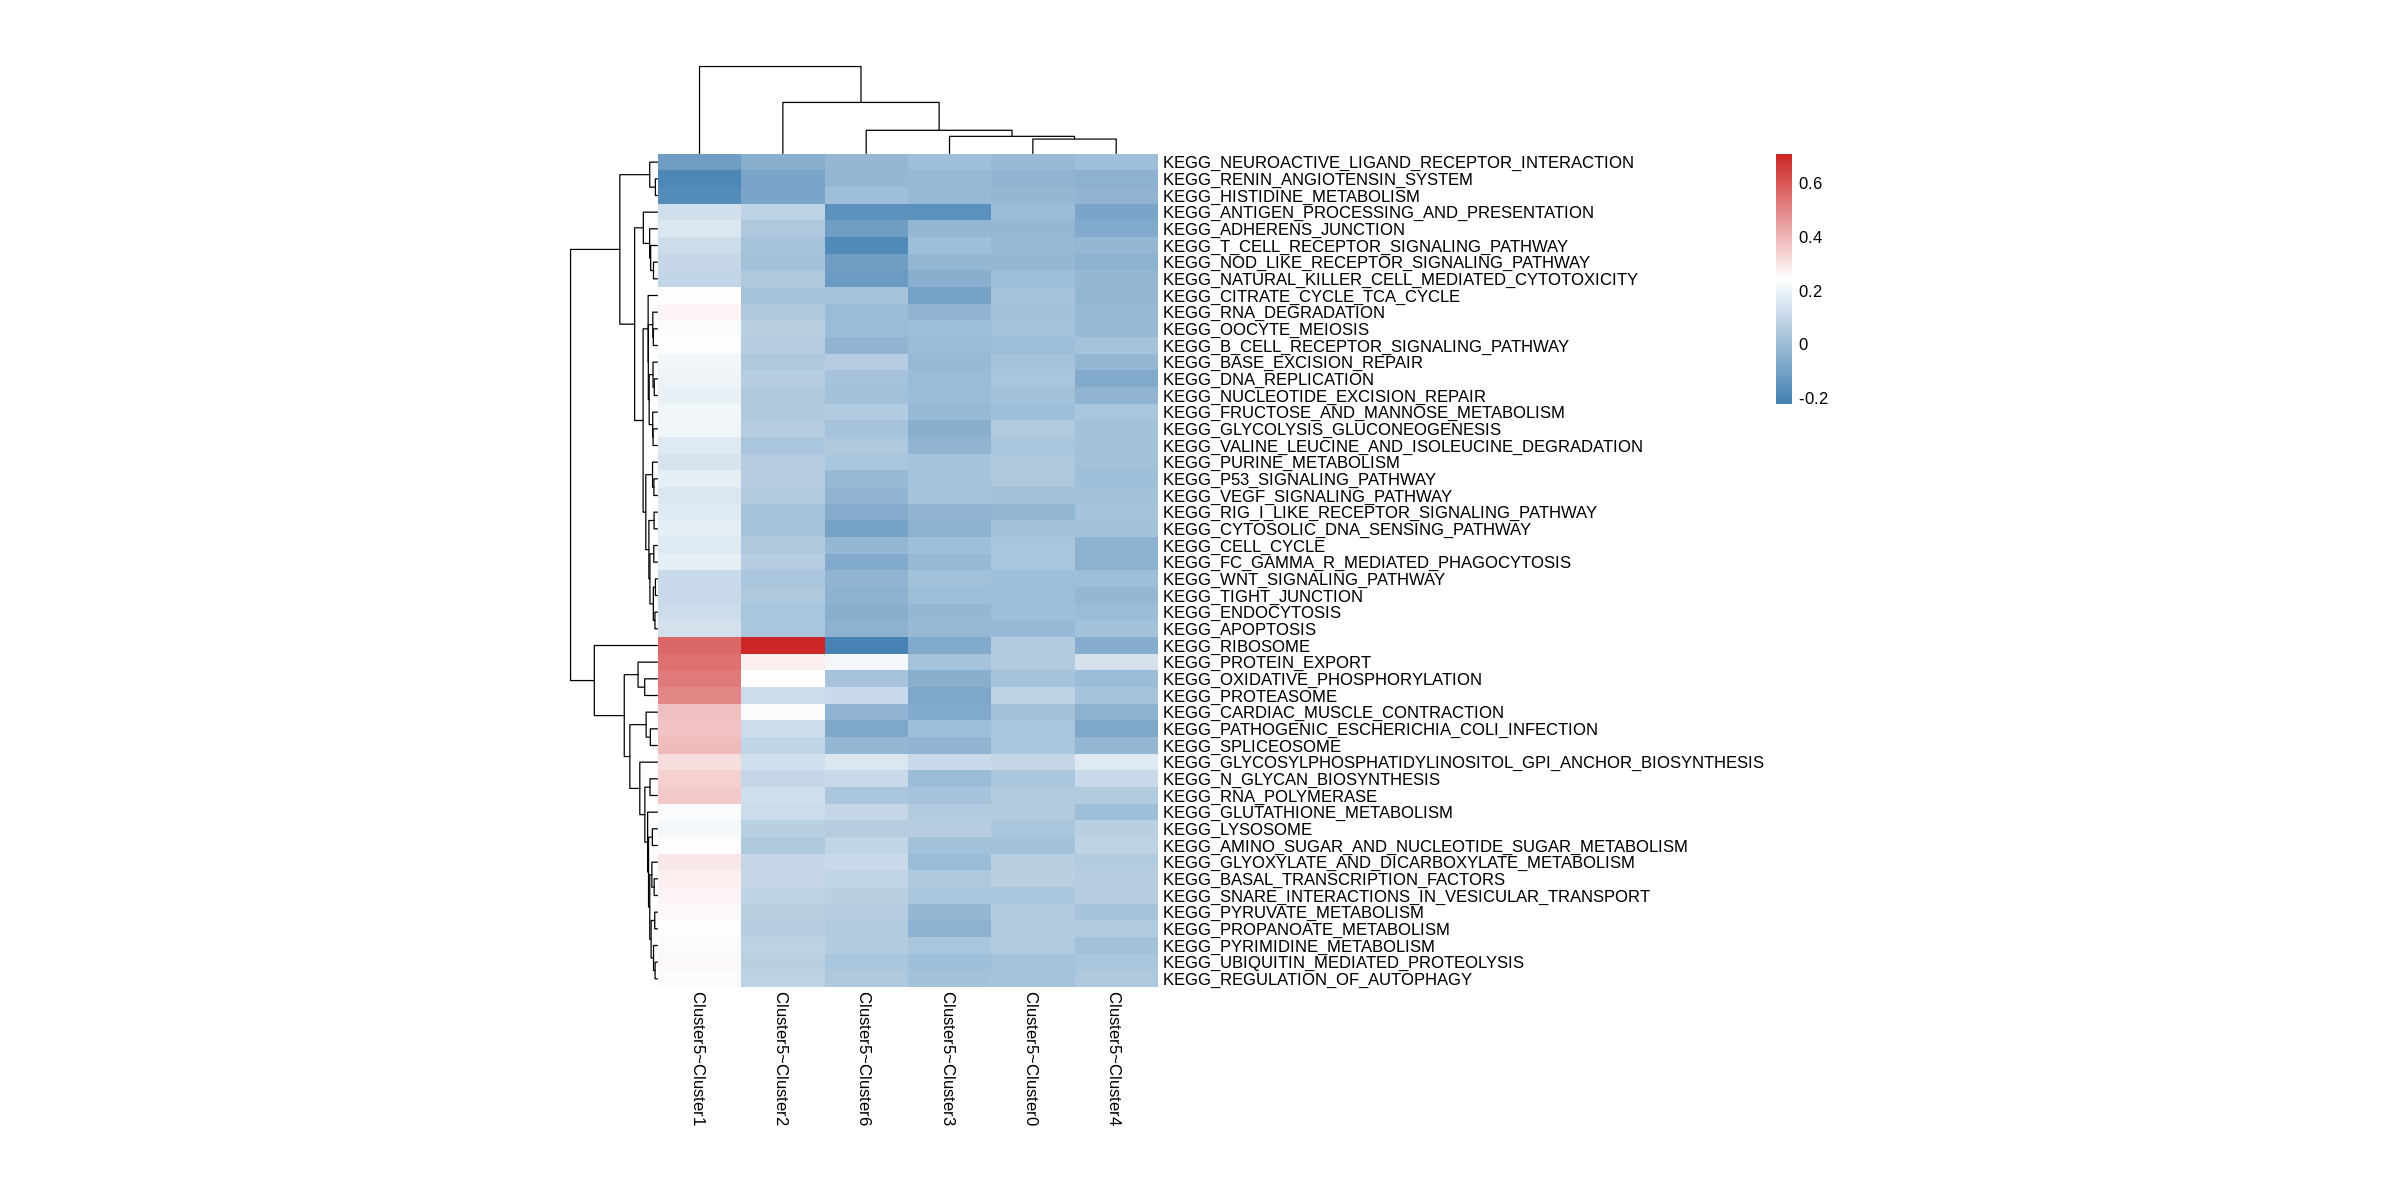

In [18]:
library(pheatmap)
data<-Diff
data2<-data[,c(1,2,3,4,5,6)]
colnames(data2)
colnames(data2)<-c("Cluster5~Cluster0","Cluster5~Cluster1","Cluster5~Cluster2", "Cluster5~Cluster3","Cluster5~Cluster4","Cluster5~Cluster6")
pheatmap(data2,border=FALSE,color=colorRampPalette(c("steelblue","white","firebrick3"))(100),cellheight=10,cellwidth=50)

In [ ]:
#another visualization

In [6]:
es <- data.frame(t(res_es),stringsAsFactors=F)  #添加到单细胞矩阵中，可视化相关通路的在umap上聚集情况，可理解为一个通路即一个基因
scRNA <- AddMetaData(allPC4, es)

In [70]:
options(repr.plot.height=7,repr.plot.width=7)

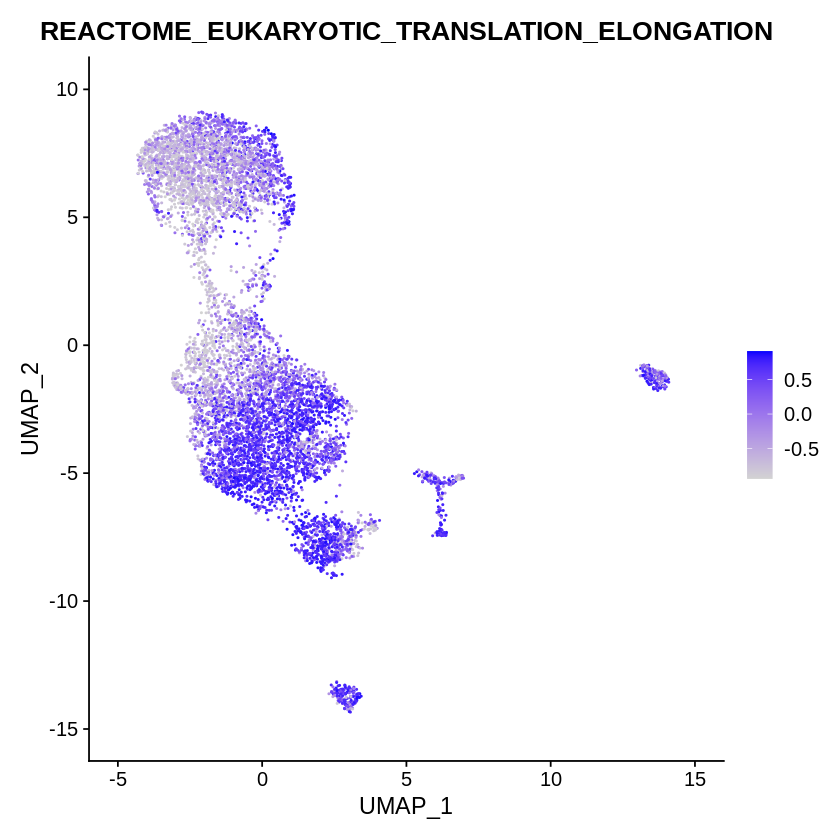

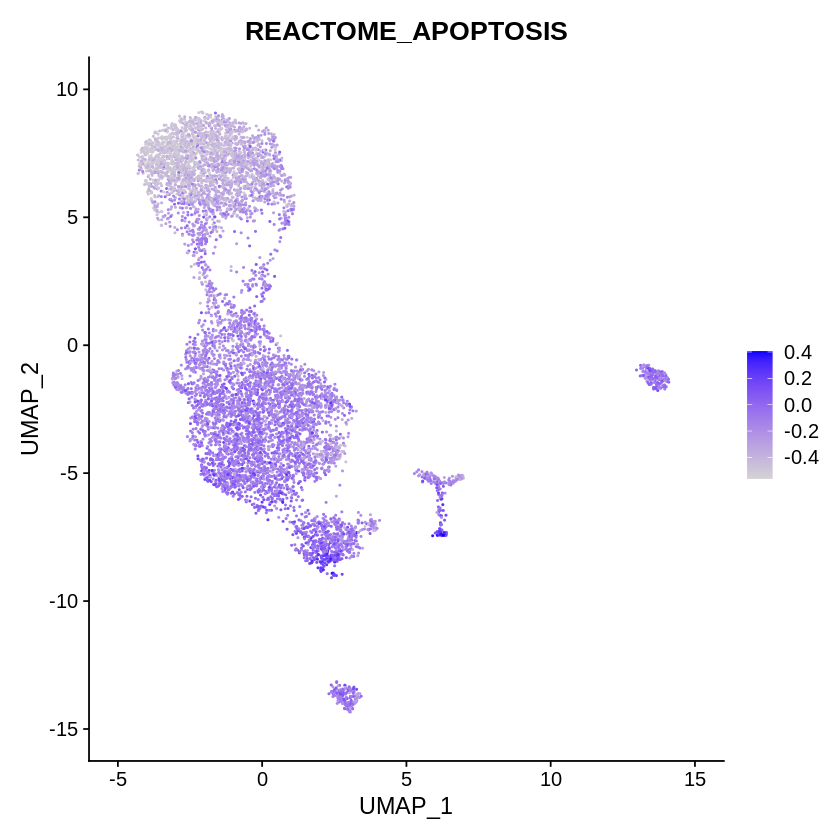

In [75]:
FeaturePlot(scRNA, features = "REACTOME_EUKARYOTIC_TRANSLATION_ELONGATION", reduction = 'umap')
FeaturePlot(scRNA, features = "REACTOME_APOPTOSIS", reduction = 'umap')

In [3]:
options(repr.plot.height=10,repr.plot.width=20)

In [ ]:
##每个细胞类别与功能相关热图
meta <- meta %>%arrange(meta$seurat_clusters)
data <- kegg[,rownames(meta)]
group <- factor(meta[,"seurat_clusters"],ordered = F)
data1 <-NULL
for(i in 0:(length(unique(group))-1)){
ind <-which(group==i)
dat <- apply(data[,ind], 1, mean)
data1 <-cbind(data1,dat)
}
colnames(data1) <-c("C0","C1","C2","C3","C4","C5","C6","C7","C8")
result<- t(scale(t(data1)))
result[result>2]=2
result[result<-2]=-2
library(pheatmap)
p <- pheatmap(result[1:20,],
                cluster_rows = F,
                cluster_cols = F,
                show_rownames = T,
                show_colnames = T,
                color =colorRampPalette(c("blue", "white","red"))(100),
                cellwidth = 10, cellheight = 15,
                fontsize = 10)
pdf(("gsva_celltype.pdf"),width = 7,height = 7)
print(p)
dev.off()